<a href="https://colab.research.google.com/github/HovhannesArustamyan/decision_tree_algorithm/blob/master/decision_tree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [560]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [561]:
data = load_wine()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [562]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [563]:
data.data.shape

(178, 13)

In [564]:
dataset = pd.DataFrame(data.data)

In [565]:
dataset.isna().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [566]:
dataset.columns = data.feature_names

In [567]:
dataset['target'] = data.target

In [568]:
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


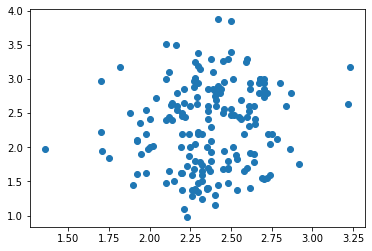

In [569]:
plt.scatter(dataset.iloc[:,2], dataset.iloc[:,5])

In [583]:
X  = dataset.iloc[:,0:12] 
y = dataset.target
print(X.shape)
print(y.shape)

(178, 12)
(178,)


In [584]:
X_train ,X_test , y_train , y_test = train_test_split(X, y, random_state=16 , test_size=0.2 )
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.400000,1.06,2.31
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.740000,1.07,3.21
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.000000,1.17,2.82
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.600000,1.24,3.37
...,...,...,...,...,...,...,...,...,...,...,...,...
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.600000,0.73,3.10
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.600000,1.19,2.30
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.850000,1.28,3.07
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.000000,0.93,3.69


In [585]:
dec_tree = DecisionTreeClassifier(random_state=0)

In [586]:
grid_params ={"max_depth": list(range(1,14)) , 
              "criterion": ['gini' , 'entropy']}

In [587]:
gridSearch_clf = GridSearchCV(dec_tree, grid_params , cv=5 , return_train_score=False)
gridSearch_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13]})

In [588]:
result_dataframe = pd.DataFrame(gridSearch_clf.cv_results_)
result_dataframe

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003182,0.001023,0.001991,0.000560,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.620690,0.620690,0.642857,0.714286,0.714286,0.662562,0.043001,25
1,0.002773,0.000228,0.001584,0.000056,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.827586,0.862069,0.892857,0.928571,0.892857,0.880788,0.033928,13
2,0.002791,0.000301,0.001586,0.000138,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.827586,0.931034,0.928571,0.892857,0.892857,0.894581,0.037359,1
3,0.002704,0.000131,0.001677,0.000312,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.827586,0.931034,0.928571,0.892857,0.892857,0.894581,0.037359,1
4,0.003249,0.000617,0.001938,0.000348,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.827586,0.931034,0.928571,0.892857,0.892857,0.894581,0.037359,1
5,0.002799,0.000069,0.001705,0.000247,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.827586,0.931034,0.928571,0.892857,0.892857,0.894581,0.037359,1
6,0.002780,0.000162,0.001587,0.000099,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.827586,0.931034,0.928571,0.892857,0.892857,0.894581,0.037359,1
7,0.002754,0.000057,0.001571,0.000021,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.827586,0.931034,0.928571,0.892857,0.892857,0.894581,0.037359,1
8,0.002782,0.000160,0.001574,0.000033,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.827586,0.931034,0.928571,0.892857,0.892857,0.894581,0.037359,1
9,0.002810,0.000361,0.001561,0.000061,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.827586,0.931034,0.928571,0.892857,0.892857,0.894581,0.037359,1


In [ ]:
result_dataframe = pd.DataFrame(gridSearch_clf.cv_results_)
result_dataframe[['param_criterion','param_max_depth','mean_test_score']]

In [590]:
gridSearch_clf.best_index_

2

In [593]:
clf_tree = DecisionTreeClassifier(random_state=0, criterion='entropy' , max_depth=5)
model = clf_tree.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test,y_pred))

1.0
0.8888888888888888


In [594]:
dot_data= export_graphviz(clf_tree ,out_file=None, feature_names=X_train.columns , precision=2, impurity= True,
                          class_names= ['clas0','clas1','clas2'], filled= True , rounded=True  , proportion=True)

In [581]:
graph = pydotplus.graph_from_dot_data(dot_data)

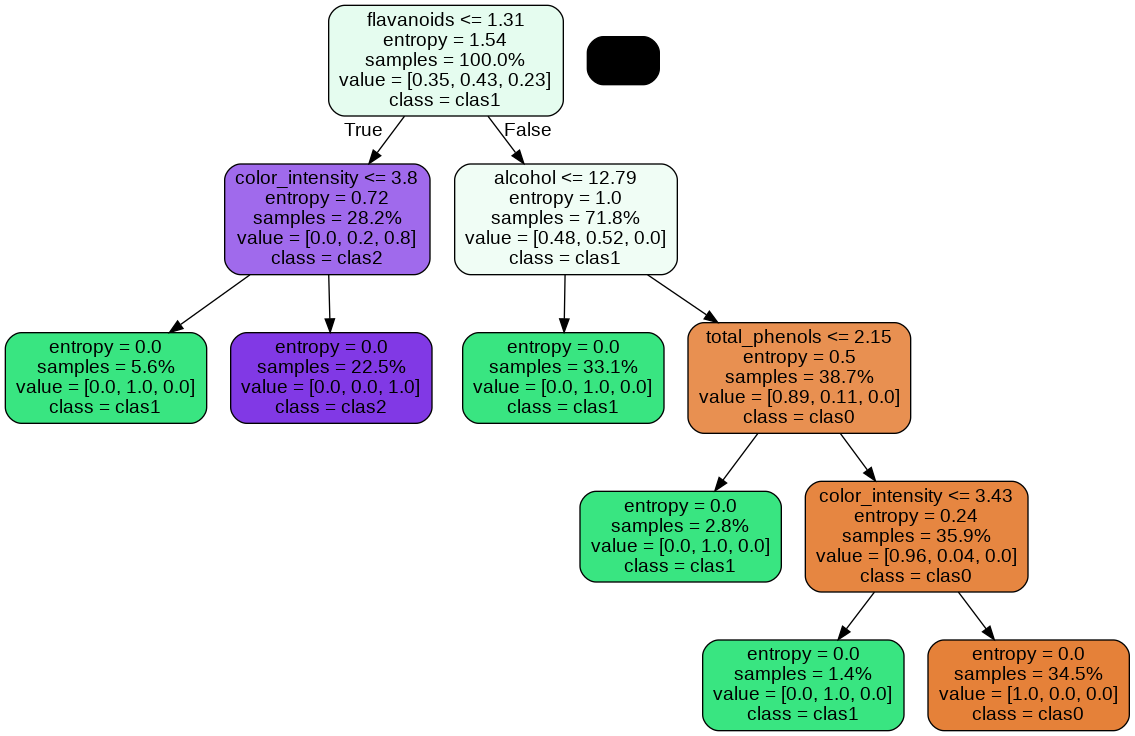

In [595]:
Image(graph.create_png())